In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import csv
import gmplot
import requests
from nltk.corpus import stopwords # Used for processing most popular topics, may require downloading
from bs4 import BeautifulSoup
import nltk
from sklearn.utils import shuffle

In [2]:
cd ./Analysis/Mastodon/

/Users/luke/ece143/ECE143Project/Analysis/Mastodon


In [3]:
import generate_instance_coordinates
import generate_map
import generate_instance_data
import popular_topics
import population
import intersection
import dcfunding

In [4]:
cd ../..

/Users/luke/ece143/ECE143Project


# Contribution of various platforms to data breaches

0                                    Facebook
1                                   Instagram
2                                     Twitter
3                                    LinkedIn
4                      Russia's Facebook (VK)
5     Job Hunting Sites (apart from LinkedIn)
6                      Yahoo and Yahoo voices
7                                    Snapchat
8                                Dating Sites
9                                     Gaming 
10                                       Misc
11                           Not Social Media
Name: Entity, dtype: object


Text(0.5, 1.0, 'Contribution of various platforms to data breaches')

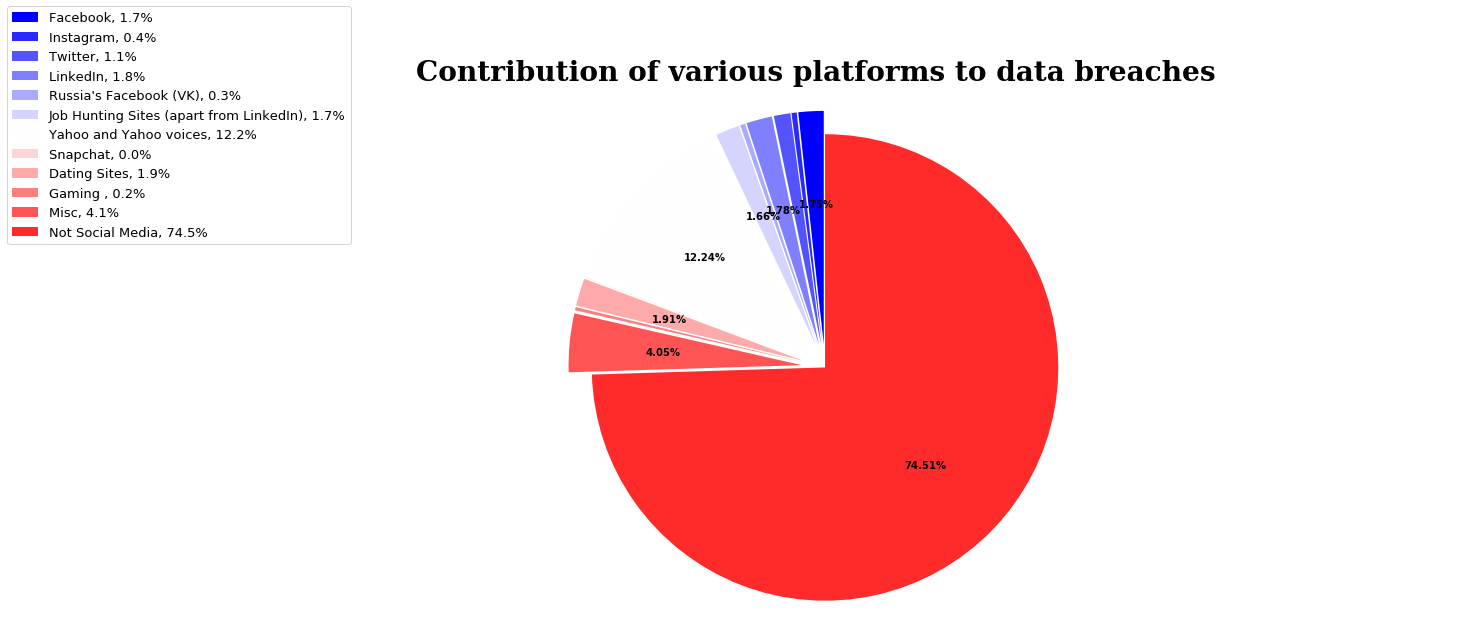

In [5]:
from matplotlib import cm
%matplotlib inline

def autopct_generator(limit):
    """Remove percent on small slices."""
    def inner_autopct(pct):
        return ('%.2f%%' % pct) if pct > limit else ''
    return inner_autopct

data = pd.read_excel('./Datasets/Data Breaches/cleaned_social_media.xlsx')
labels = data['Entity']
print(labels)
sizes = data['records lost']
NUM_COLORS = len(sizes)

fig1, ax1 = plt.subplots(figsize=(18,10))

theme = plt.get_cmap('bwr')
ax1.set_prop_cycle(color=[theme(
    1. * i / NUM_COLORS) for i in range(NUM_COLORS)])

box = ax1.get_position()
ax1.set_position([box.x0, box.y0, box.width * 1.3, box.height])

_, _, autotexts = ax1.pie(
    sizes, autopct=autopct_generator(1.5),explode = (0.1, 0.1, 0.1, 0.1,0.1,0.1,0.1,0.1,0.1,0.1,0.1,0), startangle=90)
for autotext in autotexts:
    autotext.set_weight('bold')
ax1.axis('equal')
total = sum(sizes)
plt.legend(
    loc='upper left',
    labels=['%s, %1.1f%%' % (
        l, (float(s) / total) * 100) for l, s in zip(labels, sizes)],
    prop={'size': 13},
    bbox_to_anchor=(0.0, 1),
    bbox_transform=fig1.transFigure
)
#defining fonts
font = {'family': 'serif',
        'color':  'black',
        'weight': 'heavy',
        'size': 28,
        }

plt.title('Contribution of various platforms to data breaches',fontdict=font)

# Contribution of various social media platforms to data breaches

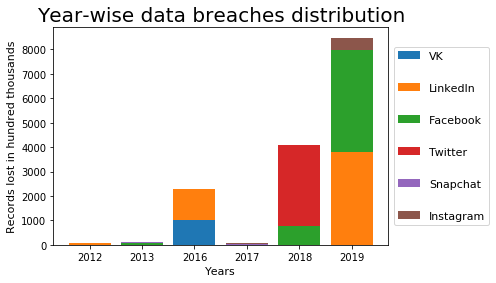

In [6]:
fig, ax1 = plt.subplots()

Entity_info = pd.read_excel('./Datasets/Data Breaches/sensitivityandyearofbreach.xlsx')['Entity']
Year_info = pd.read_excel('./Datasets/Data Breaches/sensitivityandyearofbreach.xlsx')['YEAR']
Records_lost = pd.read_excel('./Datasets/Data Breaches/sensitivityandyearofbreach.xlsx')['records lost']
total_records = [sum(Records_lost[Entity_info == 'Facebook']) , sum(Records_lost[Entity_info == 'Instagram']) , sum(Records_lost[Entity_info == "VK"]) ,sum(Records_lost[Entity_info == 'Twitter']),sum(Records_lost[Entity_info == 'LinkedIn']),sum(Records_lost[Entity_info == 'SnapChat'])]
total_records = [i/100000 for i in total_records]

order = ['2012','2013','2016','2017','2018','2019']

vk = (0,0,1005.44934,0,0,0)
linkedin = (80,0,1265,0,0,3800)
fb = (0,60,0,0,790,4190)
twitter = (0,2.5,0,0,3300,0)
sc = (0,47,0,17,0,0)
insta = (0,0,0,60,0,490)


ind = np.arange(len(order))    # the x locations for the groups

p1 = ax1.bar(ind, vk)
p2 = ax1.bar(ind, linkedin, bottom=vk)
p3 = ax1.bar(ind, fb, bottom=(np.array(vk)+np.array(linkedin)))
p4 = ax1.bar(ind, twitter, bottom=(np.array(vk)+np.array(linkedin)+ np.array(fb)))
p5 = ax1.bar(ind, sc, bottom=(np.array(vk)+np.array(linkedin)+ np.array(fb) + np.array(twitter)))
p6 = ax1.bar(ind, insta, bottom=(np.array(vk)+np.array(linkedin)+ np.array(fb) + np.array(twitter)+ np.array(sc)))



ax1.set_ylabel('Records lost in hundred thousands',fontsize = 11)
ax1.set_xlabel('Years',fontsize = 11)
ax1.set_title('Year-wise data breaches distribution',fontsize = 20)

plt.xticks(ind,order)
ax1.set_yticks(np.arange(0, 8480, 1000))
ax1.legend((p1[0], p2[0],p3[0], p4[0],p5[0], p6[0]), ('VK', 'LinkedIn','Facebook', 'Twitter','Snapchat', 'Instagram'),labelspacing = 2,loc='center left', bbox_to_anchor=(1, 0.5),fontsize = 11)
plt.show()



# Data Sensitivity

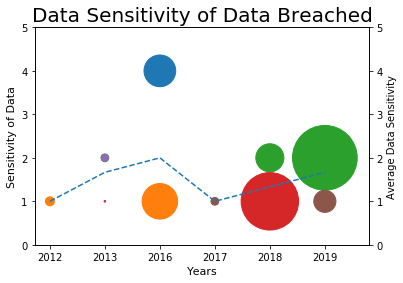

In [7]:
fig, ax1 = plt.subplots()

Entity_info = pd.read_excel('./Datasets/Data Breaches/sensitivityandyearofbreach.xlsx')['Entity']
Year_info = pd.read_excel('./Datasets/Data Breaches/sensitivityandyearofbreach.xlsx')['YEAR']
Records_lost = pd.read_excel('./Datasets/Data Breaches/sensitivityandyearofbreach.xlsx')['records lost']
total_records = [sum(Records_lost[Entity_info == 'Facebook']) , sum(Records_lost[Entity_info == 'Instagram']) , sum(Records_lost[Entity_info == "VK"]) ,sum(Records_lost[Entity_info == 'Twitter']),sum(Records_lost[Entity_info == 'LinkedIn']),sum(Records_lost[Entity_info == 'SnapChat'])]
total_records = [i/100000 for i in total_records]

order = ['2012','2013','2016','2017','2018','2019']

vk_w = (0,0,4,0,0,0)
linkedin_w = (1,0,1,0,0,2)
fb_w = (0,2,0,0,2,2)
twitter_w = (0,1,0,0,1,0)
sc_w = (0,2,0,1,0,0)
insta_w = (0,0,0,1,0,1)

def zero_to_nan(values):
    """Replace every 0 with 'nan' and return a copy."""
    return [float('nan') if x==0 else x for x in values]

vk = zero_to_nan(vk_w)
linkedin = zero_to_nan(linkedin_w)
fb = zero_to_nan(fb_w)
twitter = zero_to_nan(twitter_w)
sc = zero_to_nan(sc_w)
insta = zero_to_nan(insta_w)

vk_r = (0,0,1005.44934,0,0,0)
linkedin_r = (80,0,1265,0,0,3800)
fb_r = (0,60,0,0,790,4190)
twitter_r = (0,2.5,0,0,3300,0)
sc_r = (0,47,0,17,0,0)
insta_r = (0,0,0,60,0,490)


ind = np.arange(len(order))    # the x locations for the groups


# p1 = ax1.plot(ind, vk_w)
# p2 = ax1.plot(ind, linkedin_w)
# p3 = ax1.plot(ind, fb_w)
# p4 = ax1.plot(ind, twitter_w)
# p5 = ax1.plot(ind, sc_w)
# p6 = ax1.plot(ind, insta_w)

p1_p = ax1.scatter(ind, vk,s=list(vk_r), label = 'VK')
p2_p = ax1.scatter(ind, linkedin,s=list(linkedin_r), label = 'LinkedIn')
p3_p = ax1.scatter(ind, fb,s = list(fb_r), label = 'Facebook')
p4_p = ax1.scatter(ind, twitter,s = list(twitter_r), label = 'Twitter')
p5_p = ax1.scatter(ind, sc,s = list(sc_r), label = 'Snapchat')
p6_p = ax1.scatter(ind, insta,s = list(insta_r), label = 'Instagram')

ax2 = ax1.twinx()  # instantiate a second axes that shares the same x-axis
ax2.plot([1, 5/3, 2, 1, 4/3, 5/3],'--')


ax1.set_ylabel('Sensitivity of Data',fontsize = 11)
ax1.set_xlabel('Years',fontsize = 11)
ax1.set_title('Data Sensitivity of Data Breached',fontsize = 20)
ax2.set_ylabel('Average Data Sensitivity')
plt.xticks(ind,order)
ax1.set_yticks(np.arange(0, 6, 1))
ax2.set_yticks(np.arange(0, 6, 1))

# plt.gcf().set_size_inches((8, 5))    



# ax1.legend(labelspacing = 4,loc='center left', bbox_to_anchor=(1.1, 0.5))
# ax1.legend((p1[0], p2[0],p3[0], p4[0],p5[0], p6[0]), ('VK', 'LinkedIn','Facebook', 'Twitter','Snapchat', 'Instagram'))
plt.show()
# Legend:
# 1. Just email address/Online information 
# 2 SSN/Personal details 
# 3 Credit card information 
# 4 Health & other personal records 
# 5 Full details"


## Mastodon Instance Map

In [8]:
generate_instance_coordinates.generate('./Datasets/Mastodon/')

In [9]:
generate_map.generate('./Datasets/Mastodon/instance_coordinates.csv')
# Note: The heatmap in the presentation slides has markers on each point from the csv file,
# but the heatmap produced does not include markers

## Extract data from Mastodon API

In [10]:
generate_instance_data.generate('./Datasets/Mastodon/')

## Most Popular Topics

[nltk_data] Downloading package stopwords to /Users/luke/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


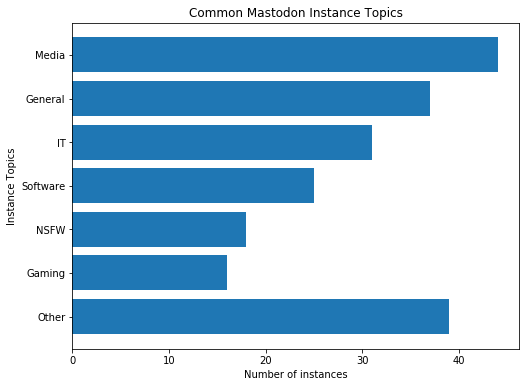

In [11]:
nltk.download('stopwords')
popular_topics.produce_topics()

## Mastodon Population Growth Over Time

/Applications/anaconda3/lib/python3.7/site-packages/pandas/plotting/_matplotlib/converter.py:103: FutureWarning: Using an implicitly registered datetime converter for a matplotlib plotting method. The converter was registered by pandas on import. Future versions of pandas will require you to explicitly register matplotlib converters.

To register the converters:
	>>> from pandas.plotting import register_matplotlib_converters
	>>> register_matplotlib_converters()
  warnings.warn(msg, FutureWarning)


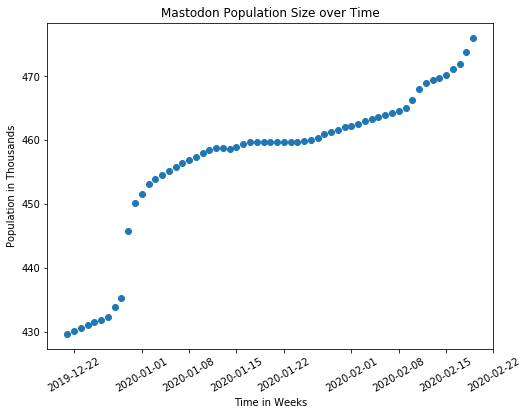

In [12]:
population.generate()

## Mastodon and Reddit Intersection

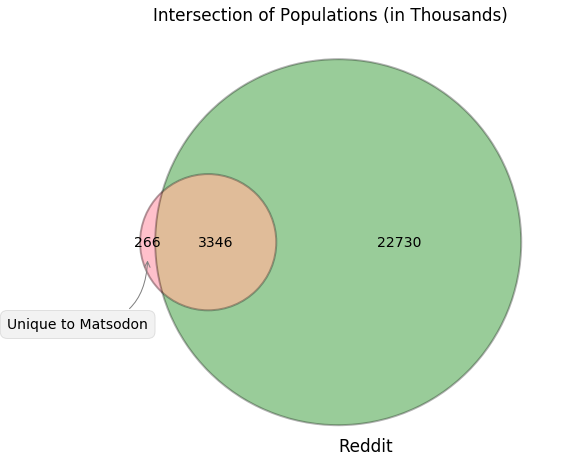

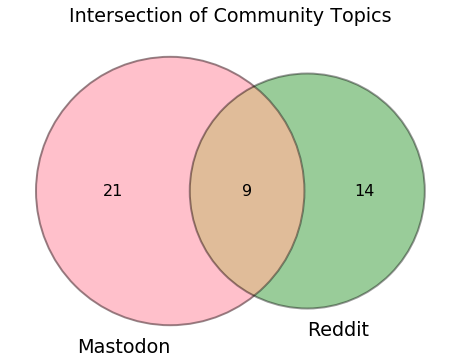

In [13]:
intersection.generate()

## MyPersonality Dataset

In [4]:
df2 = pd.read_csv('./Datasets/MyPersonality/mypersonality_final.csv',encoding = "ISO-8859-1")
df2 = shuffle(df2)
df2.head()

,#AUTHID,STATUS,sEXT,sNEU,sAGR,sCON,sOPN,cEXT,cNEU,cAGR,cCON,cOPN,DATE,NETWORKSIZE,BETWEENNESS,NBETWEENNESS,DENSITY,BROKERAGE,NBROKERAGE,TRANSITIVITY
3828,9f320ade181aa12bf10361871afa8d90,is now on (the) twitter. This had better be wo...,1.80,3.00,2.45,3.75,2.85,n,y,n,y,n,07/30/09 04:27 AM,198.0,17832.2,92.37,0.05,18495.0,0.48,0.29
3422,6f2bebc01062eb8334dccba3e048fdb5,monday night malaise,4.20,1.55,4.95,3.40,4.65,y,n,y,n,y,08/25/09 01:18 AM,294.0,40662.7,95.06,0.03,41888.0,0.49,0.14
6475,8bfbf6d9c91e07247d0ff83bbcacee68,is done with work on Friday!! :-D,4.50,2.25,3.75,2.25,4.00,y,n,y,n,y,08/03/09 02:04 PM,676.0,222411.0,97.77,0.01,225707.0,0.50,0.06
2554,a4fb2531183a186f2b5362ab89d885a2,*PROPNAME* is a bully... T_T,2.00,2.65,3.95,2.80,2.65,n,n,y,n,n,11/23/09 02:53 AM,628.0,193156.0,98.42,0.01,194779.0,0.50,0.05
5861,ed9073376c5004080ba59ac69f2a1cc3,we need more long weekends.,2.75,2.65,3.50,4.10,4.15,n,n,n,y,y,12/07/09 03:44 AM,258.0,29260.8,88.95,0.07,30879.0,0.47,0.46


Description of features from https://github.com/daureg/wcpr13/blob/master/wcpr13_guidelines.txt

gold standard labels include:
sEXT	extraversion (score)
sNEU	neuroticism (score)
sAGR	agreableness (score)
sCON	conscientiousness (score)
sOPN	openness (score)

cEXT	extraversion (label: y=extravert, n=shy)
cNEU	neuroticism (label: y=neurotic, n=secure)
cAGR	agreableness (label: y=friendly, n=uncooperative)
cCON	conscientiousness (label: y=precise, n=careless)
cOPN	openness (label: y=insightful, n=unimaginative)

## Mastodon Revenue Model

In [14]:
monthly_donations = 6380
total_patrons = 752

patrons = pd.read_csv('Datasets/Mastodon/mastodon_patreon.csv')

patrons = dcfunding.calc_donations(patrons,total_patrons)
patrons.head()

total donations per month (lower bound): 6341


,Donation level,min_donation,benefits,count,total_donations
0,Every dollar counts,1,Access to development Discord,601,601
1,Sponsors,10,"Your name on the sponsors list, as well as pre...",88,880
2,Highlighted sponsors,20,Listed at the top of the general sponsors list...,15,300
3,Silver sponsors,40,Your name and link along with a small avatar o...,24,960
4,Gold sponsors,100,Your medium-sized logo as a link at the very t...,12,1200


The patrons data is best illustrated in a pie chart.

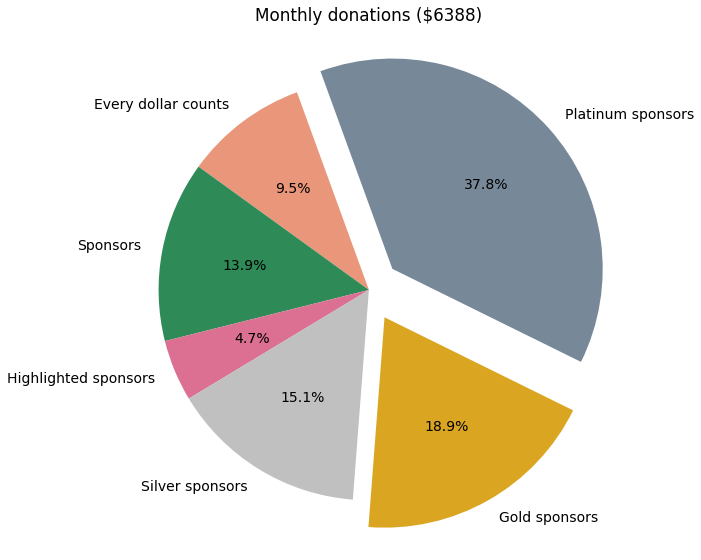

In [15]:
fig, ax = plt.subplots(figsize=(12, 8))
ratios = list(patrons['total_donations'])
labels = list(patrons['Donation level'])
explode = [0, 0, 0, 0, 0.15, 0.15] # isolate platinum and gold sponsors
colors = ['darksalmon','seagreen','palevioletred','silver','goldenrod','lightslategrey']
angle = 110  # rotate so that platinum and gold are split by the x-axis

ax.pie(ratios, autopct='%1.1f%%', startangle=angle, labels=labels, explode=explode,colors=colors)
ax.set_title('Monthly donations ($6388)')
ax.figure.savefig('Figures/mastodon_sponsors.png', transparent=True)
plt.tight_layout()
plt.show()

Furthermore, we can look into company donations through the platinum and gold sponsors:

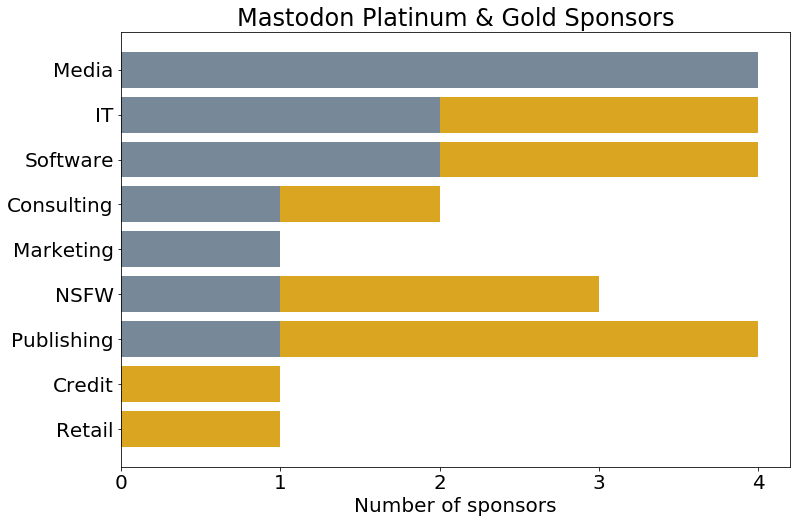

In [16]:
co_sponsors = pd.read_csv('Datasets/Mastodon/mastodon_gold_sponsors.csv')
ind_co_sponsors = dcfunding.ind_platgold(co_sponsors,plotName='Figures/mastodon_pg_sponsors.jpg')

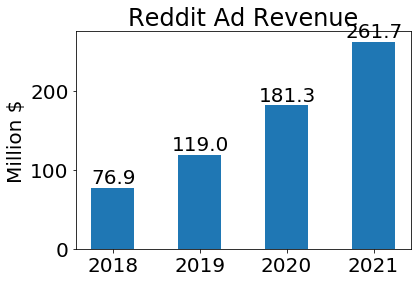

In [17]:
years = ['2018', '2019', '2020', '2021']
revenue = [76.9, 119, 181.3, 261.7]

x = np.arange(len(years))  # the year locations
width = 0.5  # the width of the bars

fig, ax = plt.subplots()
rects1 = ax.bar(x , revenue, width)

# Add some text for labels, title and custom x-axis tick labels, etc.
ax.set_ylabel('Million $')
ax.set_title('Reddit Ad Revenue')
ax.set_xticks(x)
ax.set_xticklabels(years)
#ax.legend()


def autolabel(rects):
    """Attach a text label above each bar in *rects*, displaying its height."""
    for rect in rects:
        height = rect.get_height()
        ax.annotate('{}'.format(height),
                    xy=(rect.get_x() + rect.get_width() / 2, height),
                    xytext=(1,0.5),  # 3 points vertical offset
                    textcoords="offset points",
                    ha='center', va='bottom')

autolabel(rects1)

plt.show()